In [74]:
%pip install numpy pandas matplotlib seaborn nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

plt.style.use('ggplot')

import nltk


╭──────────────────────────────────────────────────────────╮
│                                                          │
│  "As long as I’m alive, there are infinite chances.     │
│   You can’t give up. That’s what it means to be a pirate!"│
│                                                          │
│                     — Monkey D. Luffy                    │
╰──────────────────────────────────────────────────────────╯


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [75]:
# Read in data
df = pd.read_csv('/home/amitdubey/Downloads/sentiment-analysis/artifacts/Reviews.csv')
print(df.shape)
df = df.head(500)
print(df.shape)

(568454, 10)
(500, 10)


In [76]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
df.duplicated().sum()

np.int64(0)

In [5]:
df.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [6]:
df.select_dtypes(include="number").skew()

Id                        0.000000
HelpfulnessNumerator      4.529099
HelpfulnessDenominator    3.788763
Score                    -1.750381
Time                     -1.057075
dtype: float64

In [7]:
df["Text"].values[0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

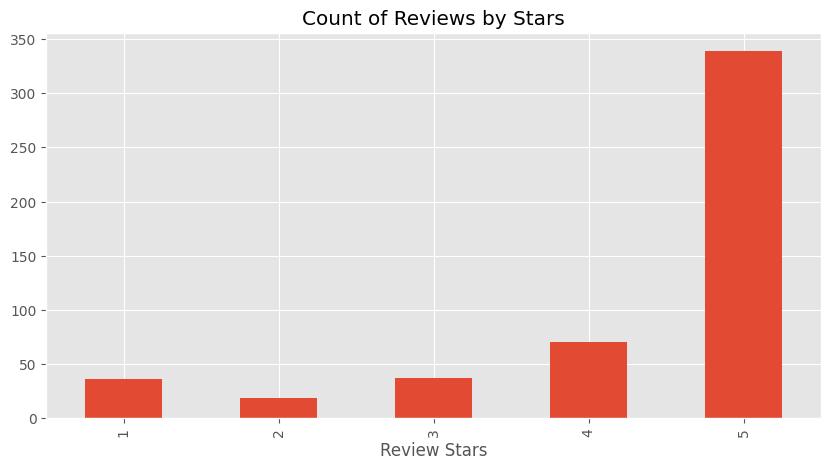

In [8]:
ax = df['Score'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

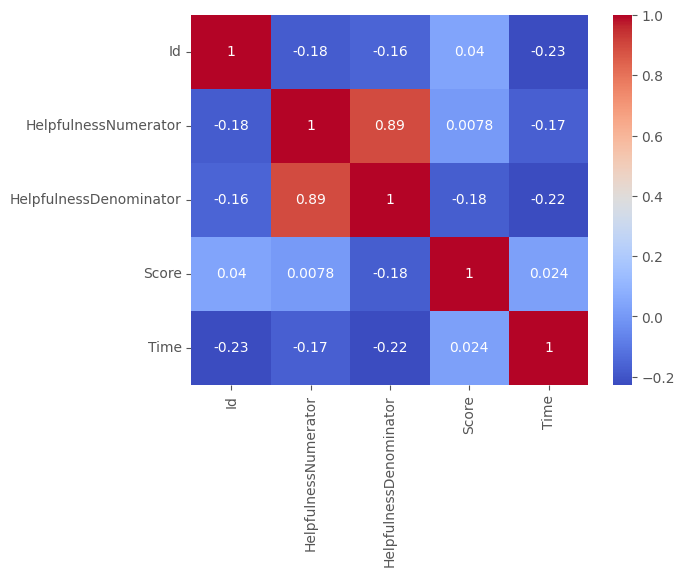

In [9]:
corr = df.select_dtypes(include="number").corr()

sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

In [10]:
nltk.download('vader_lexicon')

from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm import tqdm

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/amitdubey/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [11]:
sia.polarity_scores('I am not  so happy!')

{'neg': 0.575, 'neu': 0.425, 'pos': 0.0, 'compound': -0.62}

In [12]:
%pip install -U tqdm jupyter ipywidgets
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)


╭──────────────────────────────────────────────────────────╮
│                                                          │
│  "As long as I’m alive, there are infinite chances.     │
│   You can’t give up. That’s what it means to be a pirate!"│
│                                                          │
│                     — Monkey D. Luffy                    │
╰──────────────────────────────────────────────────────────╯


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


100%|██████████| 500/500 [00:00<00:00, 1321.38it/s]


In [13]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, on='Id', how='left')

In [14]:
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


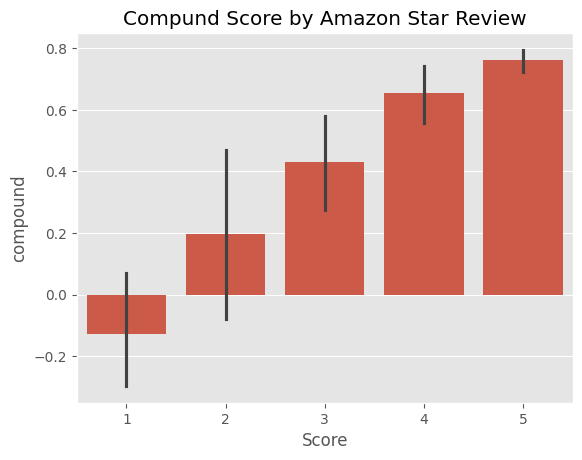

In [15]:
ax = sns.barplot(data=vaders, x='Score', y='compound')
ax.set_title('Compund Score by Amazon Star Review')
plt.show()

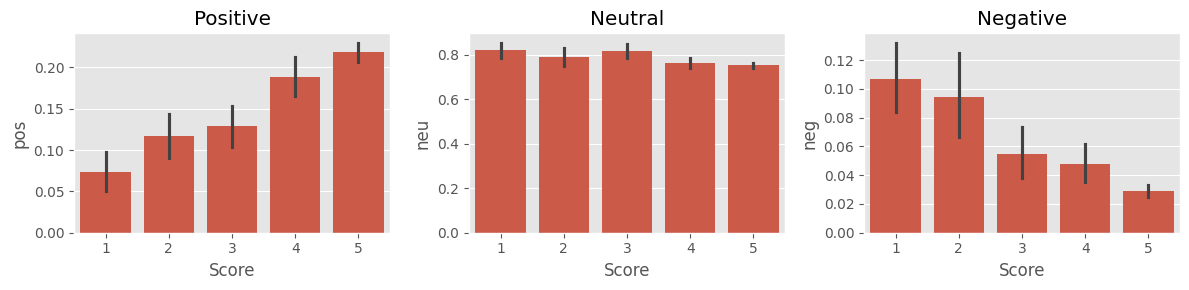

In [16]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

In [17]:
%pip install transformers scipy
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax


╭──────────────────────────────────────────────────────────╮
│                                                          │
│  "As long as I’m alive, there are infinite chances.     │
│   You can’t give up. That’s what it means to be a pirate!"│
│                                                          │
│                     — Monkey D. Luffy                    │
╰──────────────────────────────────────────────────────────╯


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [18]:
%pip install torch


╭──────────────────────────────────────────────────────────╮
│                                                          │
│  "As long as I’m alive, there are infinite chances.     │
│   You can’t give up. That’s what it means to be a pirate!"│
│                                                          │
│                     — Monkey D. Luffy                    │
╰──────────────────────────────────────────────────────────╯


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [19]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [20]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [21]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Text']
        myid = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

 17%|█▋        | 83/500 [00:11<00:41, 10.12it/s]

Broke for id 83


 37%|███▋      | 186/500 [00:24<00:35,  8.83it/s]

Broke for id 187


100%|██████████| 500/500 [01:02<00:00,  7.96it/s]


In [22]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how='left')

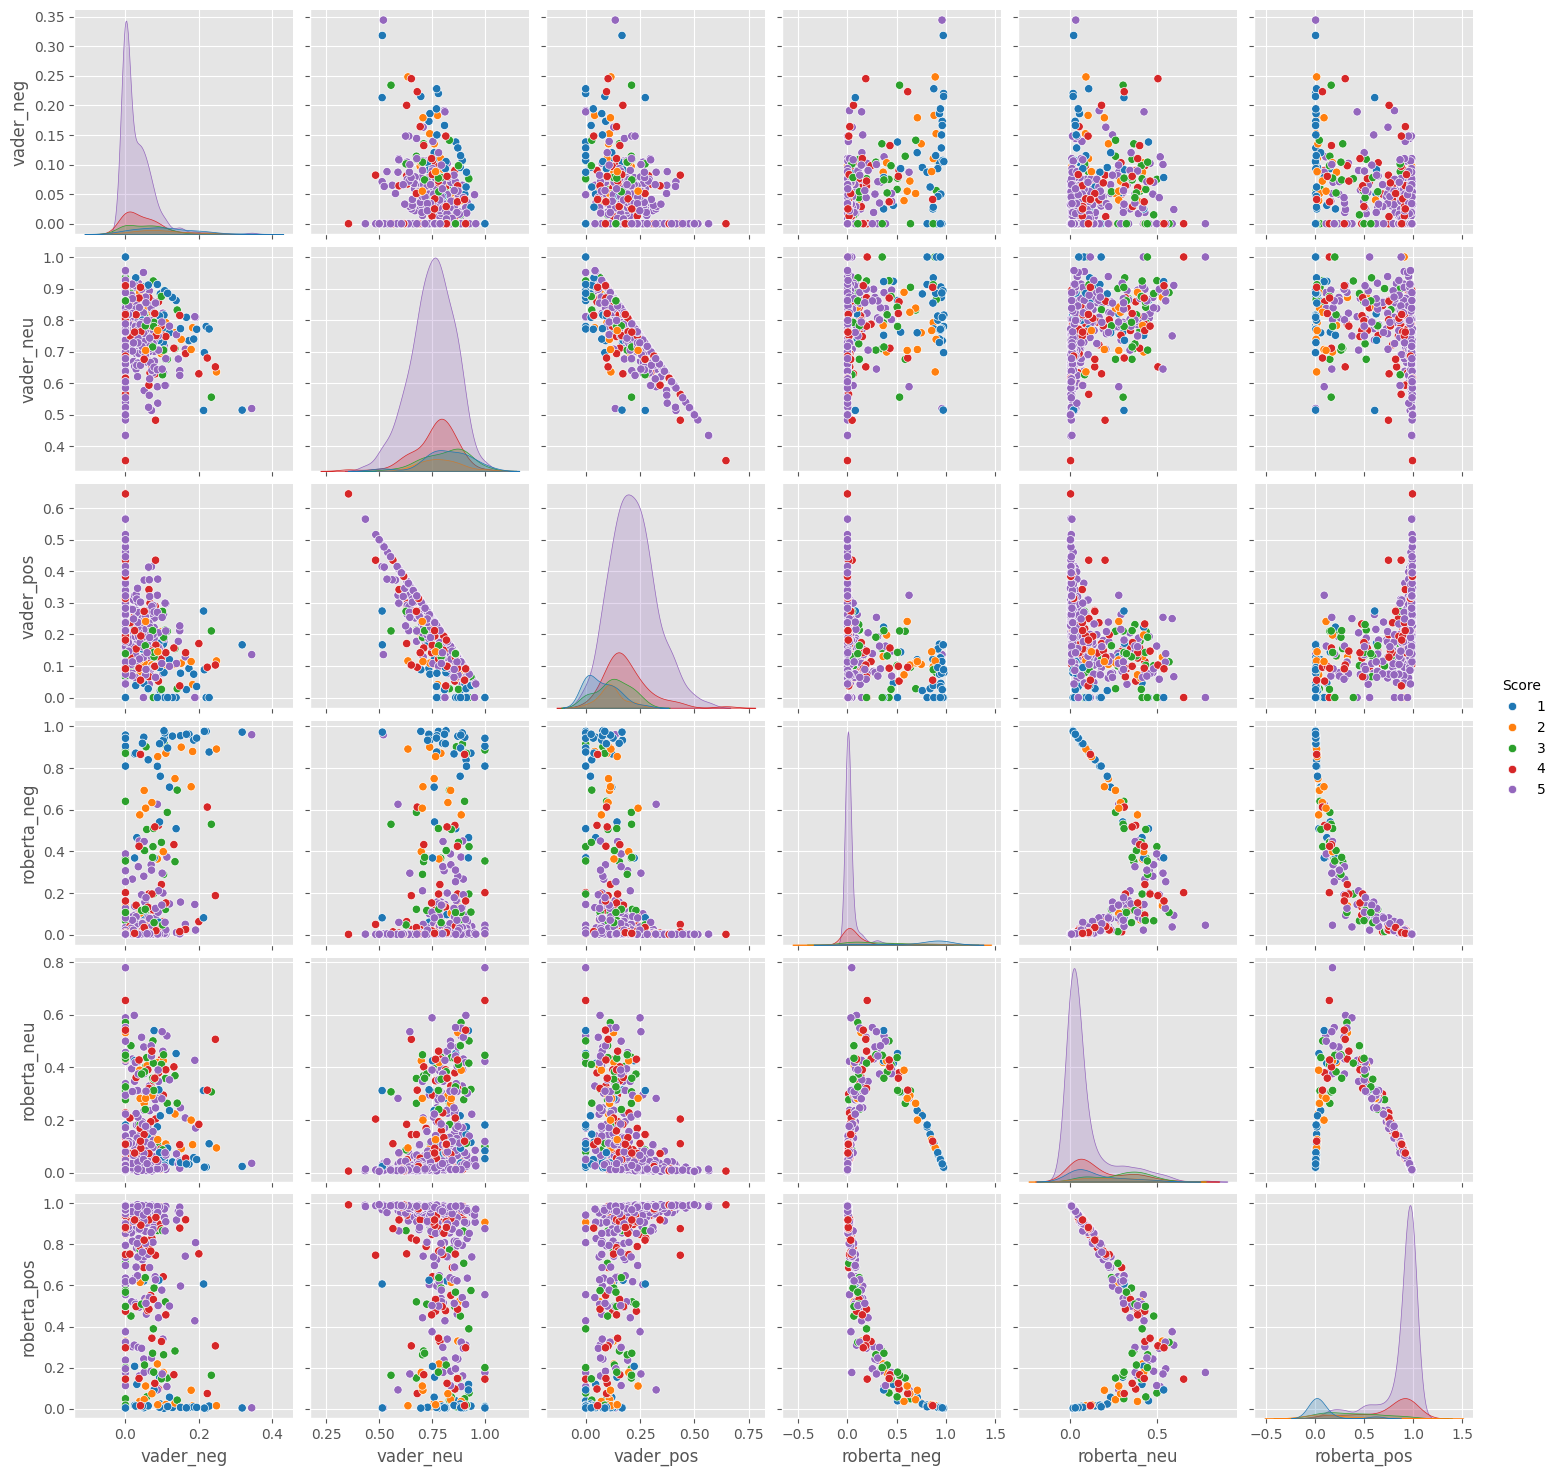

In [23]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Score',
            palette='tab10')
plt.show()

In [26]:
from transformers import pipeline
sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda:0


In [25]:
sent_pipeline('wo we lost all our players played better than them')

[{'label': 'NEGATIVE', 'score': 0.9996308088302612}]

In [35]:
tokenizer = AutoTokenizer.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")
model = AutoModelForSequenceClassification.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/669M [00:00<?, ?B/s]

In [42]:
tokens=tokenizer.encode('This is a great movie,but it could have been better', return_tensors='pt')
print(tokens)

tensor([[  101, 10372, 10127,   143, 11838, 13113,   117, 10502, 10197, 12296,
         10574, 10662, 16197,   102]])


In [43]:
tokenizer.decode(tokens[0])

'[CLS] this is a great movie, but it could have been better [SEP]'

In [44]:
result=model(tokens)

In [48]:
result.logits

tensor([[-2.2639, -1.0437,  1.1700,  1.6884,  0.4064]],
       grad_fn=<AddmmBackward0>)

In [52]:
int(torch.argmax(result.logits))+1

4

In [61]:
dict={}
for i,re in tqdm(df.iterrows(), total=len(df)):
    try:
        text = re['Text']
        myid = re['Id']
        tokens=tokenizer.encode(text, return_tensors='pt')
        result=model(tokens)
        sentiment=int(torch.argmax(result.logits))+1
        dict[str(myid)]=sentiment
    except RuntimeError:
        print(f'Broke for id {myid}')

 17%|█▋        | 84/500 [00:18<00:59,  7.03it/s]

Broke for id 83


 37%|███▋      | 186/500 [00:43<01:04,  4.83it/s]

Broke for id 187


 74%|███████▍  | 372/500 [01:32<00:19,  6.51it/s]

Broke for id 371


100%|██████████| 500/500 [02:02<00:00,  4.09it/s]


In [64]:
results_=pd.DataFrame(dict, index=[0]).T
results_=results_.reset_index().rename(columns={'index':'Id', 0:'Sentiment'})
print(results_)

      Id  Sentiment
0      1          5
1      2          1
2      3          5
3      4          5
4      5          5
..   ...        ...
492  496          5
493  497          5
494  498          5
495  499          3
496  500          5

[497 rows x 2 columns]
